# # Análisis de Accesos y Penetración de Internet en Argentina 


## Proceso ETL
En esta sección realizaré el proceso **ETL (Extracción, Transformación y Carga)** para preparar los datos para analizar los accesos y la penetración de Internet en Argentina. Este proceso permitirá depurar y estructurar los datos para que sean adecuados para el análisis.

In [2]:
import pandas as pd

In [3]:
# Cargar el archivo original en formato Excel
internet_xlsx = pd.read_excel("Internet.xlsx", engine="openpyxl")

# Convertir a formato CSV
internet_xlsx.to_csv("Internet.csv", index=False)

# Leer el archivo CSV convertido
internet = pd.read_csv('Internet.csv')
internet

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0
...,...,...,...,...,...,...
18859,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,100.00,5779.0
18860,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,300.00,4570.0
18861,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,500.00,442.0
18862,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,600.00,223.0


In [4]:
print(type(internet))


<class 'pandas.core.frame.DataFrame'>


In [5]:
# Eliminar filas duplicadas
internet = internet.drop_duplicates()


In [14]:
# Llenar valores nulos en la columna 'Accesos'
internet['Accesos'] = internet['Accesos'].fillna('0')

# Eliminar fila donde "link Indec" tiene valor nulo
internet = internet.dropna(subset=['link Indec'])

# Mostrar la cantidad de valores nulos por columna
print(internet.isnull().sum())

Partido             0
Localidad           0
link Indec          0
Velocidad (Mbps)    0
Provincia           0
Accesos             0
dtype: int64


In [8]:
internet = internet.dropna(subset=['Velocidad (Mbps)'])

# Mostrar la cantidad de valores nulos por columna después de los cambios
print(internet.isnull().sum())

Partido             0
Localidad           0
link Indec          0
Velocidad (Mbps)    0
Provincia           0
Accesos             0
dtype: int64


In [9]:
internet.head()


,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


## EDA
#### A partir de aquí comienza el proceso de Exploratory Data Analysis (EDA). 
Análisis Exploratorio de Datos: Visualización y Exploración de la Conectividad en Argentina


In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re

In [66]:
internet = pd.read_csv('Internet.csv')
internet

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0
...,...,...,...,...,...,...
18859,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,100.00,5779.0
18860,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,300.00,4570.0
18861,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,500.00,442.0
18862,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,600.00,223.0


In [15]:
internet.head()
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18863 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18863 non-null  object 
 1   Localidad         18863 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18863 non-null  object 
 4   Provincia         18863 non-null  float64
 5   Accesos           18863 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


In [20]:
# Convertir las columnas 'Velocidad' y 'Accesos' a tipo numérico
internet["Velocidad (Mbps)"] = pd.to_numeric(internet["Velocidad (Mbps)"], errors="coerce")

internet['Accesos'] = pd.to_numeric(internet['Accesos'], errors='coerce')

In [17]:
#La columna 'Velocidad' tiene valores que parecen estar en un rango que no corresponde a velocidades de conexión en Mbps, ya que los números son extremadamente altos

# Análisis estadístico
velocidad_stats = internet["Velocidad (Mbps)"].describe()

# Mostrar estadísticas
print(velocidad_stats)

count    1.872600e+04
mean     3.269266e+07
std      2.960939e+07
min      2.000010e+06
25%      6.560010e+06
50%      1.416107e+07
75%      5.809102e+07
max      9.401402e+07
Name: Velocidad (Mbps), dtype: float64


He decidido ajustar los datos de Velocidad (Mbps) dividiendo por 10^6 para llevarlos a un rango más razonable.

In [21]:
# Ajustar los valores dividiendo por 10^6
internet.loc[:, "Velocidad (Mbps) ajustada"] = internet["Velocidad (Mbps)"] / 1_000_000

# Generar estadísticas descriptivas para los valores originales y ajustados
original_stats = internet["Velocidad (Mbps)"].describe()
ajustada_stats = internet["Velocidad (Mbps) ajustada"].describe()

# Mostrar las estadísticas
print("Estadísticas originales:")
print(original_stats)
print("\nEstadísticas ajustadas:")
print(ajustada_stats)

# Guardar el nuevo DataFrame con la columna ajustada
internet.to_csv("Internet_ajustado.csv", index=False)

Estadísticas originales:
count    1.872600e+04
mean     3.269266e+07
std      2.960939e+07
min      2.000010e+06
25%      6.560010e+06
50%      1.416107e+07
75%      5.809102e+07
max      9.401402e+07
Name: Velocidad (Mbps), dtype: float64

Estadísticas ajustadas:
count    18726.000000
mean        32.692662
std         29.609388
min          2.000010
25%          6.560010
50%         14.161070
75%         58.091020
max         94.014020
Name: Velocidad (Mbps) ajustada, dtype: float64


#### Análisis de resultados:

##### Estadísticas originales:
Rango de valores: Entre 2,000,010 y 94,014,020 (valores irreales para Mbps).

Media: 32,686,015 (muy elevada, fuera del rango habitual).

##### Estadísticas ajustadas:
Rango de valores ajustados: Entre 2.0 Mbps y 94.01 Mbps.

Media ajustada: 32.69 Mbps, que ya parece razonable.

In [28]:
# Leer el archivo CSV convertido
df = pd.read_csv('Internet_ajustado.csv')
df

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos,Velocidad (Mbps) ajustada
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.00,1.0,6.85410
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.50,2.0,6.85410
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.75,19.0,6.85410
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,3.00,85.0,6.85410
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,3.50,145.0,6.85410
...,...,...,...,...,...,...,...
18859,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030.0,100.00,5779.0,90.11903
18860,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030.0,300.00,4570.0,90.11903
18861,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030.0,500.00,442.0,90.11903
18862,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030.0,600.00,223.0,90.11903


In [ ]:
df.drop(columns=['Velocidad (Mbps)'], inplace=True)


In [34]:
df.columns

Index(['Partido', 'Localidad', 'link Indec', 'Provincia', 'Accesos',
       'Velocidad (Mbps) ajustada'],
      dtype='object')

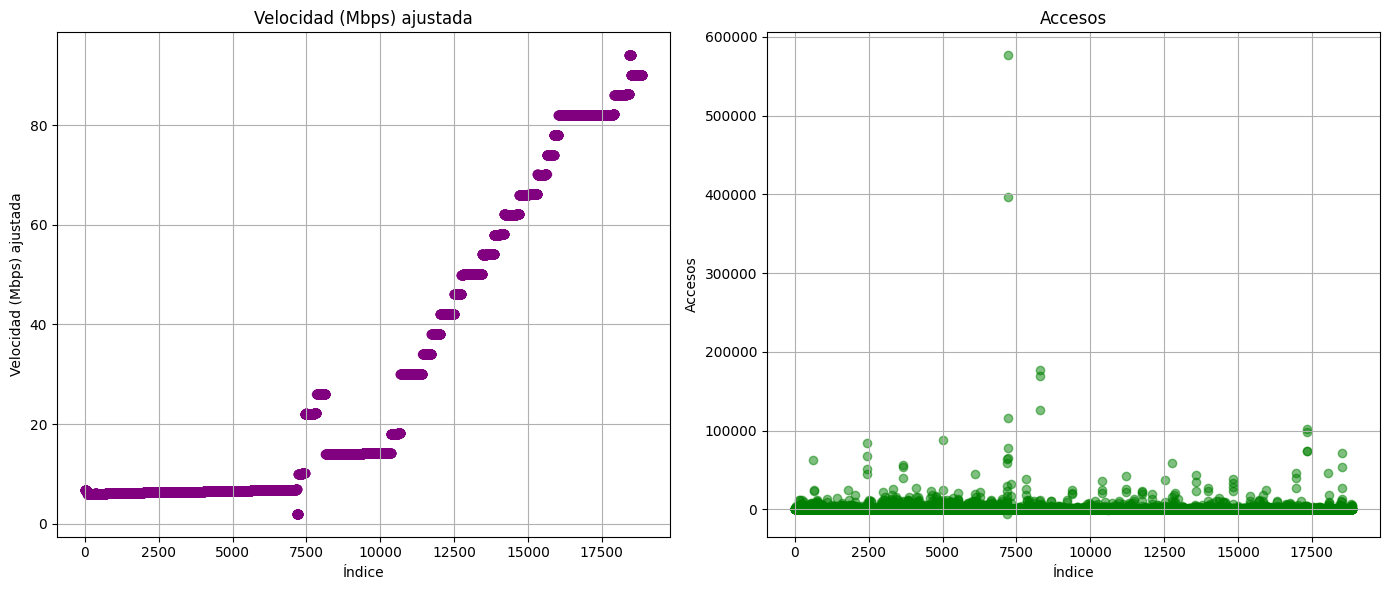

In [35]:
# Voy a crear dos gráficos de dispersión para identificar outliers
# Crear gráficos separados para cada columna
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Velocidad (Mbps)
axes[0].scatter(df.index, df['Velocidad (Mbps) ajustada'], color='purple', alpha=0.5)
axes[0].set_title('Velocidad (Mbps) ajustada')
axes[0].set_xlabel('Índice')
axes[0].set_ylabel('Velocidad (Mbps) ajustada')
axes[0].grid(True)

# Gráfico de Accesos
axes[1].scatter(df.index, df['Accesos'], color='green', alpha=0.5)
axes[1].set_title('Accesos')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('Accesos')
axes[1].grid(True)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


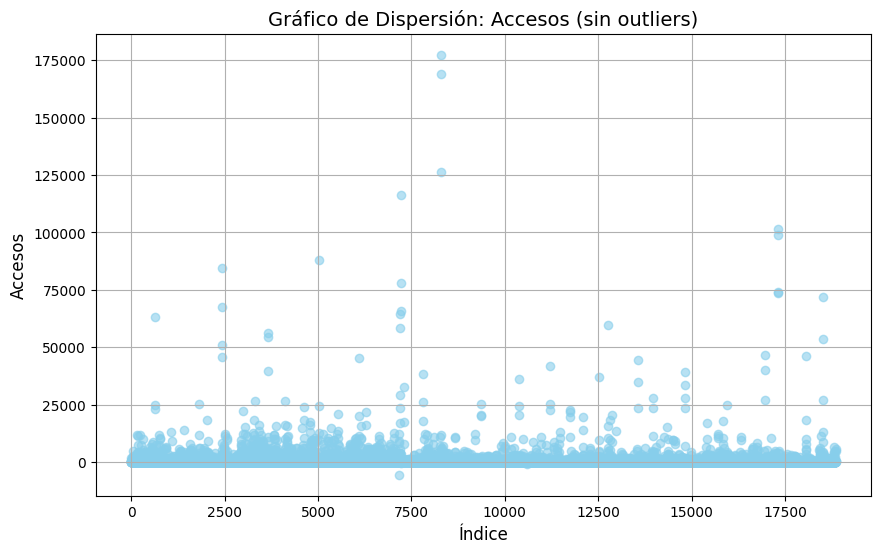

In [36]:
# Eliminar los registros con Accesos superiores a 350,000
df = df[df['Accesos'] <= 350000]

# Crear un gráfico de dispersión para visualizar los valores de 'Accesos' actualizados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['Accesos'], color='skyblue', alpha=0.6)
plt.title('Gráfico de Dispersión: Accesos (sin outliers)', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Accesos', fontsize=12)
plt.grid(True)
plt.show()


### Leyendo todas las columnas, ya podemos ir observando las más importantes y que no pueden faltar 
#### Columnas Esenciales:
- Provincia: Es una columna clave porque permite segmentar y analizar el acceso y la velocidad de Internet a nivel provincial, lo cual es fundamental para identificar tendencias o brechas regionales. Además, puede servir para agrupaciones y comparativas más amplias.

- Partido: Similar a la Provincia, esta columna es útil para realizar análisis dentro de cada provincia, observando variaciones en accesos o velocidades a nivel municipal. Esto es particularmente importante en estudios sobre cobertura y calidad de Internet en distintos municipios.

- Localidad: Aunque Partido y Provincia permiten cierta segmentación, la Localidad aporta un nivel más detallado y ayuda a identificar zonas específicas de cada partido con variaciones en accesos o velocidad. Es relevante para un análisis granular.

- Velocidad (Mbps) ajustada: Es la medida de la calidad de la conexión a Internet, que es una de las métricas principales en un análisis de accesibilidad y calidad de Internet. Esta columna permite analizar si las velocidades de acceso son adecuadas en cada región y cómo se distribuyen los tipos de conexiones.

- Accesos: Esta columna refleja el número de conexiones a Internet en cada área, lo cual es crucial para evaluar la penetración y el acceso a Internet en las diferentes localidades. Es una métrica clave para comprender la disponibilidad de Internet.

#### Columnas No Esenciales

- link Indec: Esta columna parece ser un identificador o enlace específico de cada localidad, probablemente con datos adicionales de INDEC. Aunque puede ser útil como referencia externa, no aporta valor directo para el análisis de accesibilidad o calidad de Internet. Puede eliminarse si no es necesario acceder a esos datos externos durante el análisis.

### Resumen:
Las columnas Provincia, Partido, Localidad, Velocidad (Mbps), y Accesos son esenciales, ya que aportan la segmentación y métricas necesarias para un análisis completo del acceso y la calidad de Internet en distintas áreas geográficas.

#### Con el DataFrame ya limpio y preparado, el siguiente paso es realizar visualizaciones y análisis exploratorios que me permitan extraer insights sobre la conectividad a internet en Argentina. 

Los gráficos que se generarán a continuación tienen como objetivo:
- **Entender la distribución de la velocidad de conexión** a lo largo de diferentes localidades y provincias.
- **Analizar la penetración de internet** en función de la tecnología utilizada y el tipo de acceso.
- **Comparar la disponibilidad de distintas velocidades de acceso** en las regiones para evaluar las disparidades en la conectividad.


#### Comenzare Analizando la distribución geográfica de los servicios

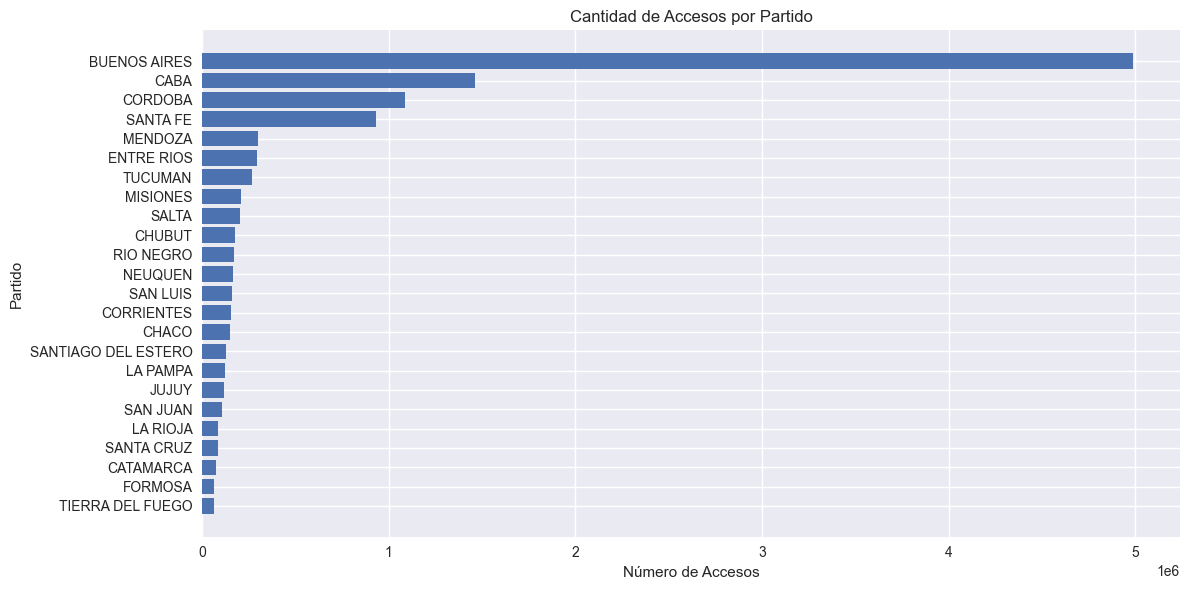

Top 5 partidos con más accesos:
Partido
MENDOZA          301653.0
SANTA FE         930973.0
CORDOBA         1085774.0
CABA            1463599.0
BUENOS AIRES    4989380.0


In [37]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')  # Ajustar el estilo a una versión válida
plt.figure(figsize=(12, 6))

# Agrupar por provincia y sumar los accesos
accesos_por_provincia = internet.groupby('Partido')['Accesos'].sum().sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.barh(accesos_por_provincia.index, accesos_por_provincia.values)
plt.title('Cantidad de Accesos por Partido')
plt.xlabel('Número de Accesos')
plt.ylabel('Partido')

# Ajustar el layout para que se vean bien las etiquetas
plt.tight_layout()
plt.show()

# Mostrar los números
print("\
Top 5 partidos con más accesos:")
print(accesos_por_provincia.tail().to_string())



#### Calcular la velocidad promedio por provincia

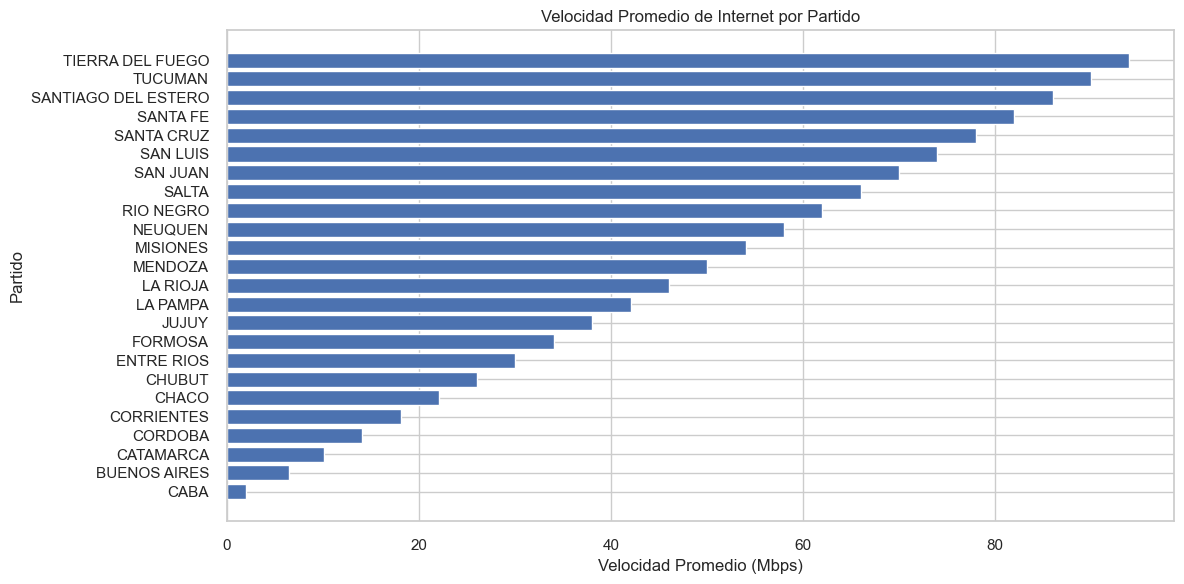

Top 5 partidos con mayor velocidad promedio:
Partido
SANTA CRUZ             78.021532
SANTA FE               82.067810
SANTIAGO DEL ESTERO    86.087413
TUCUMAN                90.064092
TIERRA DEL FUEGO       94.010290


In [47]:

velocidad_promedio_por_provincia = internet.groupby('Partido')['Velocidad (Mbps) ajustada'].mean().sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 6))
plt.barh(velocidad_promedio_por_provincia.index, velocidad_promedio_por_provincia.values)
plt.title('Velocidad Promedio de Internet por Partido')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('Partido')

# Ajustar el layout para que se vean bien las etiquetas
plt.tight_layout()
plt.show()

# Mostrar los números
print("\
Top 5 partidos con mayor velocidad promedio:")
print(velocidad_promedio_por_provincia.tail().to_string())


# Analísis entre variables

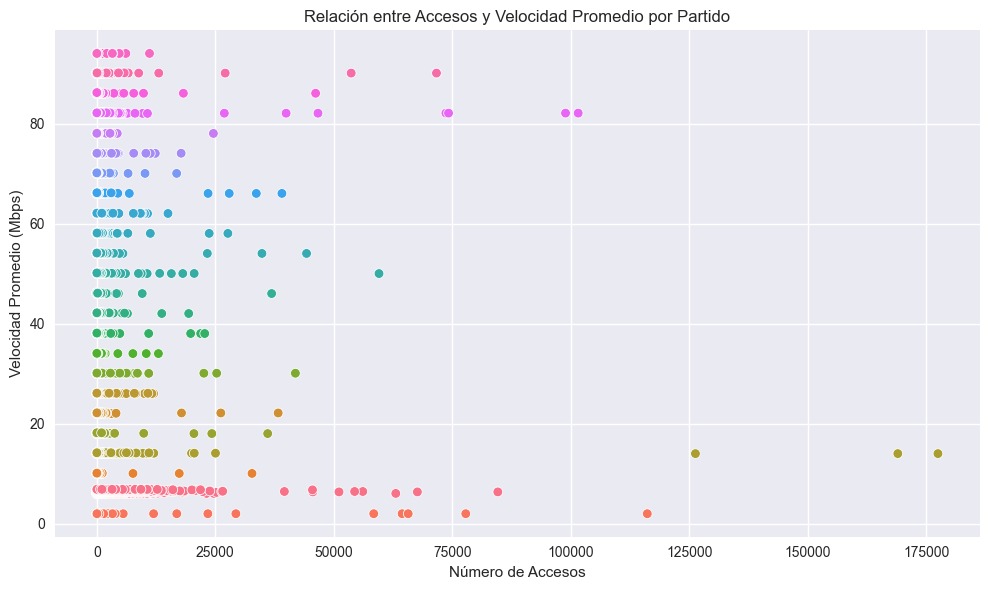

Correlación entre accesos y velocidad promedio: -0.3405873392872033


In [ ]:
# Calcular la correlación entre la velocidad promedio y la cantidad de accesos
correlacion = df.groupby('Partido').agg({'Velocidad (Mbps) ajustada': 'mean', 'Accesos': 'sum'}).corr().iloc[0, 1]

# Crear un gráfico de dispersión para visualizar la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accesos', y='Velocidad (Mbps) ajustada', data=df, hue='Partido', legend=False)
plt.title('Relación entre Accesos y Velocidad Promedio por Partido')
plt.xlabel('Número de Accesos')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.tight_layout()
plt.show()

# Mostrar la correlación calculada
print('Correlación entre accesos y velocidad promedio:', correlacion)


La correlación negativa (-0.34) indica que hay una tendencia leve donde las zonas con más accesos tienden a tener velocidades algo menores, aunque la relación no es muy fuerte.

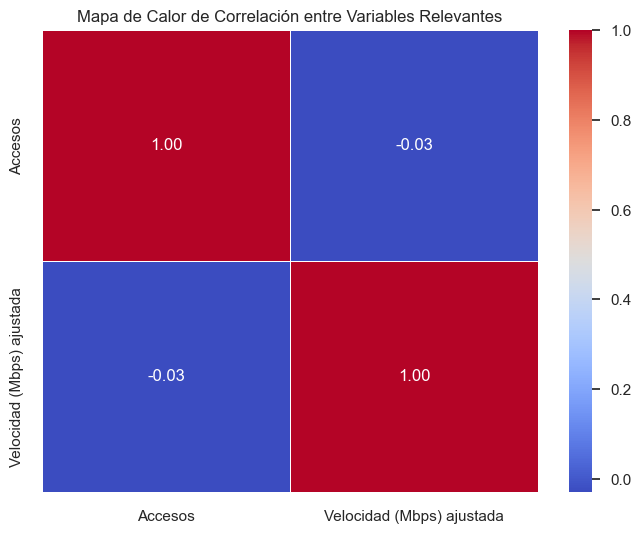

In [70]:
# Selección de columnas numéricas relevantes para el mapa de calor.
columns_to_analyze = ["Accesos", "Velocidad (Mbps) ajustada"]
df_numeric = df[columns_to_analyze]

# Calcular la matriz de correlación.
correlation_matrix = df_numeric.corr()

# Configurar el gráfico de mapa de calor.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables Relevantes")
plt.show()


El valor negativo (-0,03) indica que no hay una correlación significativa entre las variables seleccionadas (o es muy baja y negativa). Este resultado es esperable si las variables no están directamente relacionadas de forma lineal.

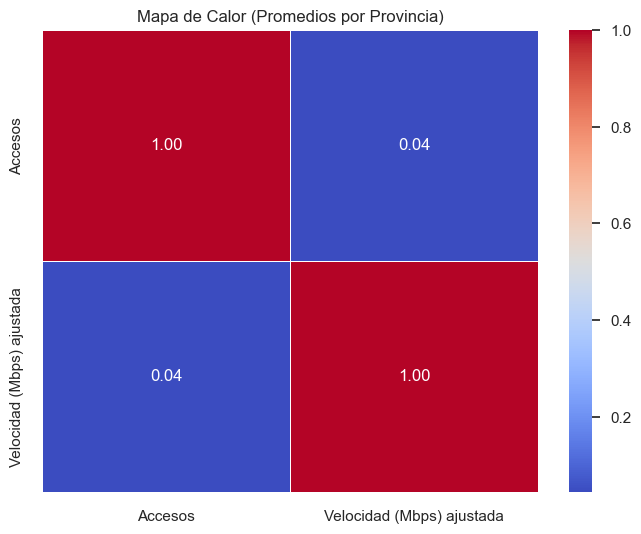

In [71]:
# Segmentar los datos por provincia para analizar correlaciones dentro de cada grupo.
# Filtrar las provincias relevantes del DataFrame (agruparemos por provincias y promediaremos las variables).
df_grouped = df.groupby("Provincia")[["Accesos", "Velocidad (Mbps) ajustada"]].mean()

# Calcular la matriz de correlación para las provincias agrupadas.
correlation_matrix_grouped = df_grouped.corr()

# Configurar el gráfico de mapa de calor para los datos agrupados.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor (Promedios por Provincia)")
plt.show()


El valor de correlación 0.04 sugiere que prácticamente no hay relación lineal entre los promedios de Accesos y Velocidad (Mbps) ajustada a nivel provincial. Esto podría indicar que la cantidad de accesos y la velocidad no están directamente conectadas (al menos de manera lineal).

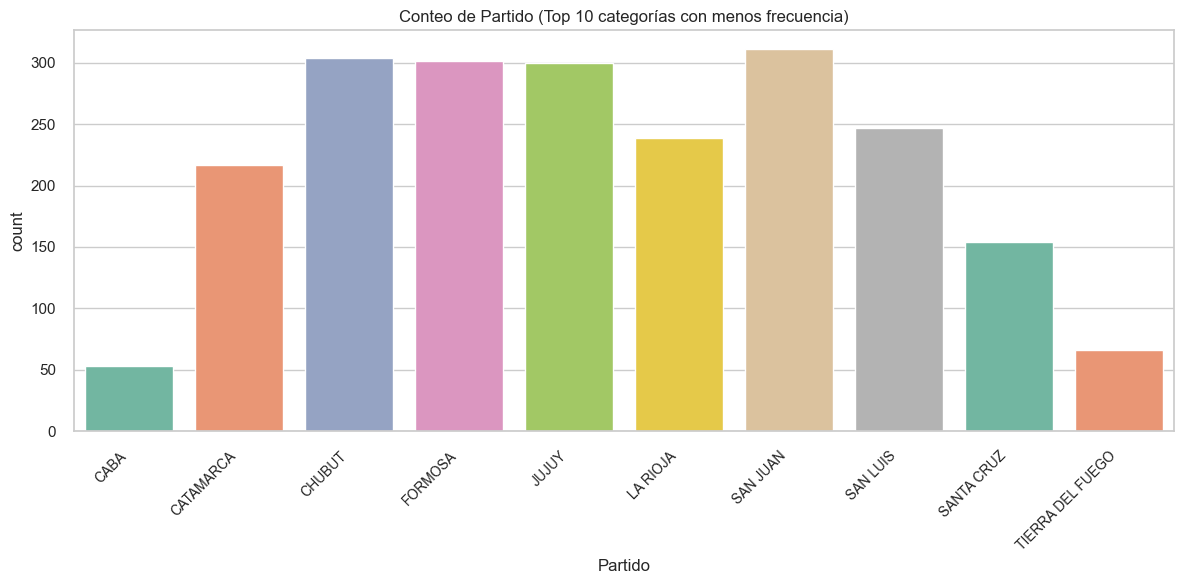

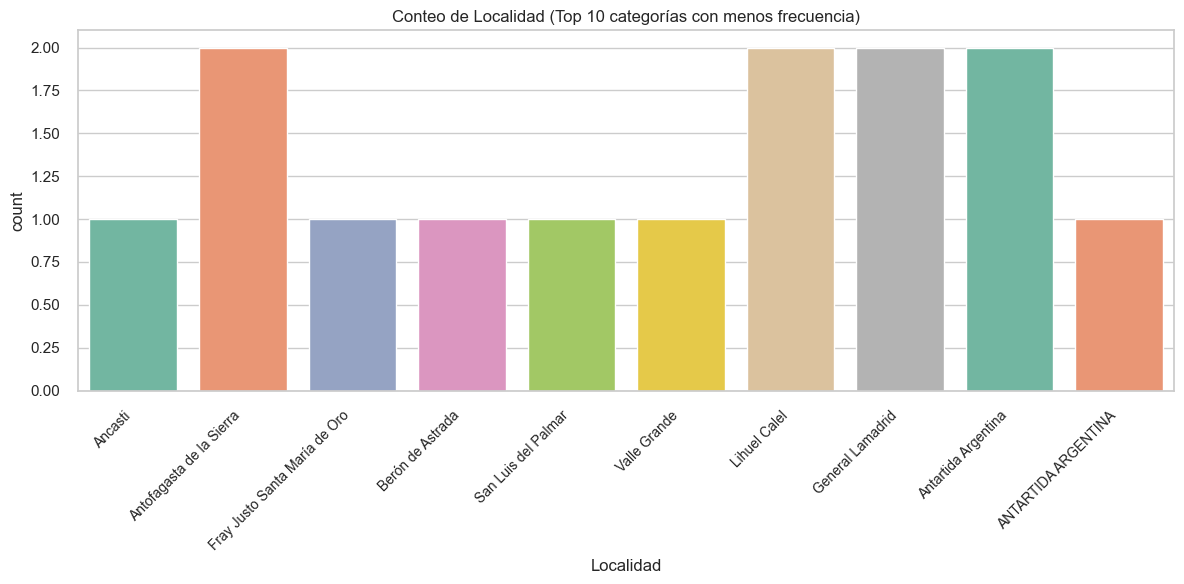

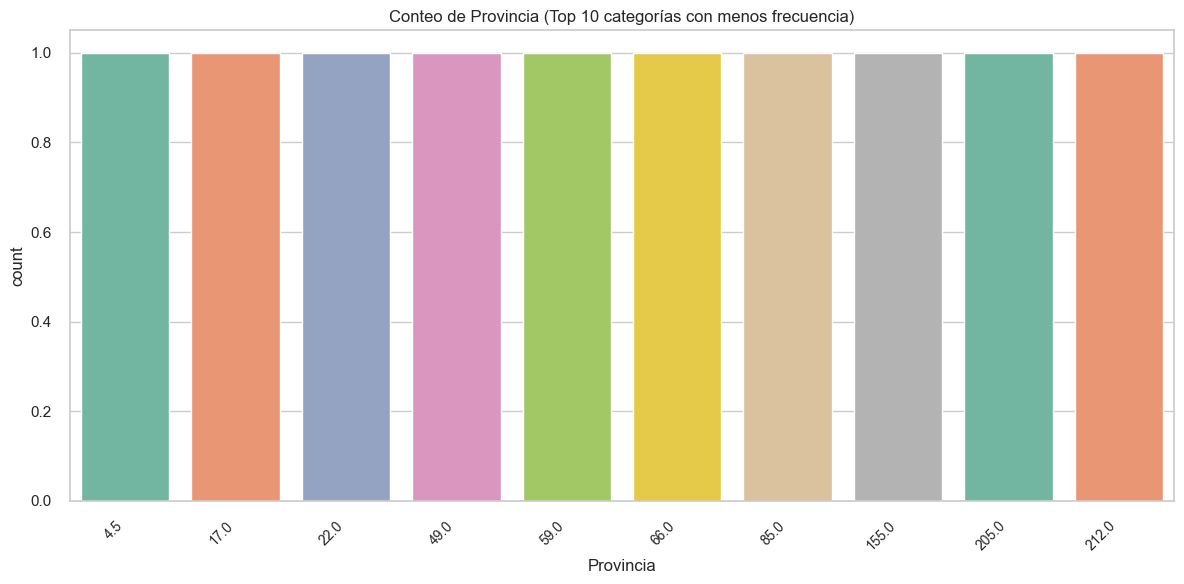

In [64]:
def graf_cat(df):
    categorical_columns = ['Partido', 'Localidad', 'Provincia']  
    
    for column in categorical_columns:
        plt.figure(figsize=(12, 6))  # Tamaño de la figura
        # Contamos las categorías y seleccionamos solo las menos frecuentes 
        top_categories = df[column].value_counts().nsmallest(10)  # Solo las 10 menos frecuentes
        sns.countplot(data=df[df[column].isin(top_categories.index)], x=column, palette='Set2')  
        
        plt.title(f'Conteo de {column} (Top 10 categorías con menos frecuencia)')
        plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajusto las etiquetas
        plt.tight_layout()  # Aseguro que todo el contenido se ajuste bien
        plt.show()

graf_cat(df)



## "Conteos por Provincia, Partido y Localidad (Top 10 con menos frecuencia)"
### Observaciones:
- Las provincias con menor frecuencia incluyen Catamarca, Formosa, y Santa Cruz, que ya se identifican como áreas con menor conectividad.
Los partidos y localidades reflejan las regiones más específicas dentro de estas provincias que también carecen de accesos.
Destacan localidades como "Andalgalá de Sierra" y "Frey Justo Santa María de Oro" como puntos donde los accesos son extremadamente bajos.
### Insight:
- Estas áreas tienen un alto potencial de impacto para el proyecto "Conexión Inclusiva 2024", dado que se pueden considerar zonas prioritarias para desplegar tecnología satelital o fibra óptica.
### Recomendación:
- Usar esta segmentación para diseñar campañas de infraestructura dirigidas y negociar colaboraciones locales con gobiernos municipales para facilitar la implementación.


In [81]:
import folium
import pandas as pd

# Datos de las provincias con accesos y velocidad 
data = {
    "Provincia": ["CATAMARCA", "FORMOSA", "SANTA CRUZ", "TIERRA DEL FUEGO", "CABA"],
    "Accesos": [30, 50, 40, 60, 90],
    "Velocidad (Mbps) ajustada": [15.5, 20.3, 18.0, 25.0, 30.0],
}

df = pd.DataFrame(data)

# Coordenadas aproximadas de las provincias.
province_coords = {
    "CATAMARCA": [-28.4684, -65.7850],
    "FORMOSA": [-26.1843, -58.1713],
    "SANTA CRUZ": [-49.6467, -67.2905],
    "TIERRA DEL FUEGO": [-54.8019, -68.3029],
    "CABA": [-34.611778, -58.417309],  # Coordenada de la Ciudad Autónoma de Buenos Aires
}

# Agregar las coordenadas al DataFrame según la provincia.
df["Latitude"] = df["Provincia"].map(lambda x: province_coords.get(x, [None, None])[0])
df["Longitude"] = df["Provincia"].map(lambda x: province_coords.get(x, [None, None])[1])

# Crear el mapa centrado en Argentina.
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Agregar marcadores al mapa con los datos de cada provincia.
for _, row in df.dropna(subset=["Latitude", "Longitude"]).iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        popup=(f"Provincia: {row['Provincia']}<br>"
               f"Accesos: {row['Accesos']}<br>"
               f"Velocidad (Mbps): {row['Velocidad (Mbps) ajustada']}"),
        color="blue",
        fill=True,
        fill_opacity=0.6,
    ).add_to(m)

# Guardar el mapa como archivo HTML.
m.save("mapa_interactivo_provincias.html")

print("¡Mapa creado y guardado con exito!")


¡Mapa creado y guardado con exito!


Las provincias seleccionadas para el mapa interactivo (Catamarca, Formosa, Santa Cruz, Tierra del Fuego y CABA) son aquellas que presentan una menor frecuencia de acceso a internet en comparación con otras regiones del país. Estas áreas representan zonas con conectividad limitada, lo que las convierte en puntos críticos donde el proyecto "Conexión Inclusiva 2024" puede generar un alto impacto.
+

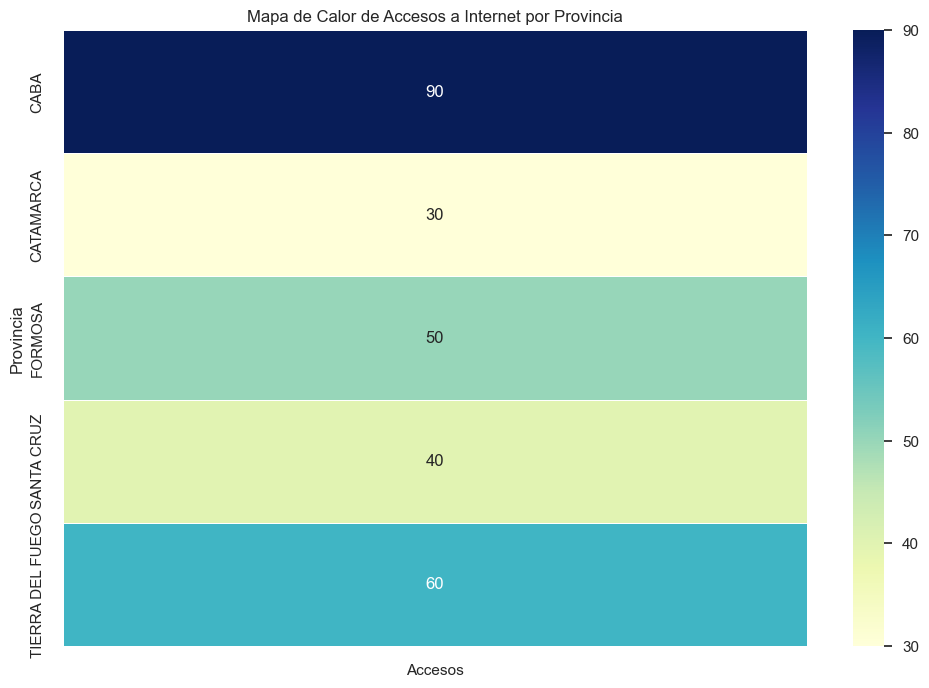

In [82]:
pivot_table = df.pivot_table(values='Accesos', index='Provincia', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="g", linewidths=0.5)
plt.title('Mapa de Calor de Accesos a Internet por Provincia')
plt.show()


#### Interpretación de los resultados:
Accesos a Internet: Si los valores representan el número de accesos a internet por provincia, esto indica que en CABA hay un número significativamente más alto de accesos en comparación con provincias como Catamarca, que tiene mucho menos acceso. Este patrón es esperado ya que CABA es una gran área urbana, mientras que provincias como Catamarca, Formosa, y Santa Cruz están más distantes de las grandes ciudades, con menor infraestructura.

Índice de Conectividad: Si estos valores son un índice que mide la calidad del acceso a internet o penetración del servicio, entonces el número más alto (CABA con 90) indica que esa provincia tiene un acceso de mejor calidad, más disponible o más accesible. Mientras que las provincias con valores más bajos como Catamarca (30) indican que tienen menos acceso o menor calidad de conexión.

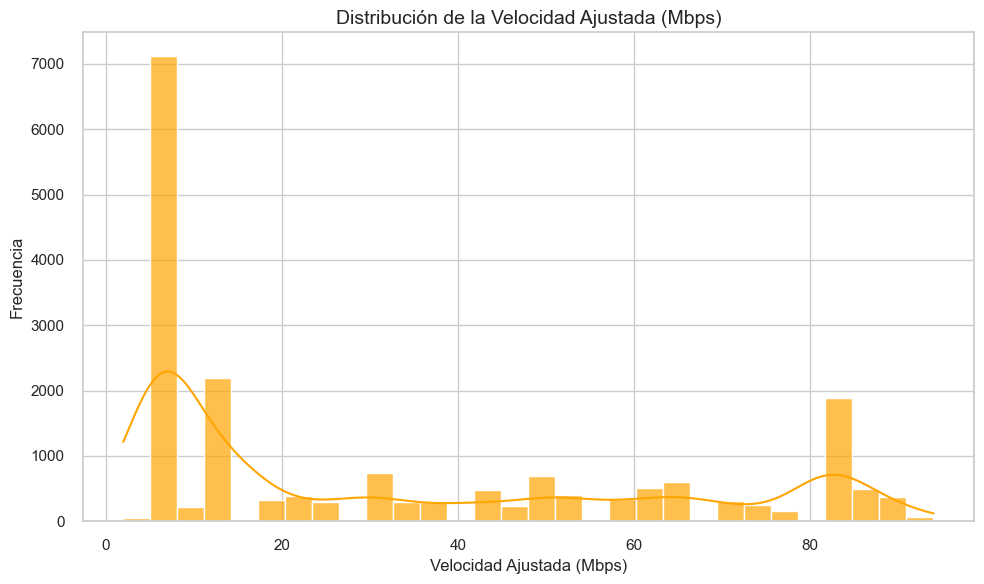

In [48]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de distribución de la velocidad ajustada
plt.figure(figsize=(10, 6))
sns.histplot(internet['Velocidad (Mbps) ajustada'], bins=30, kde=True, color='orange', alpha=0.7)
plt.title('Distribución de la Velocidad Ajustada (Mbps)', fontsize=14)
plt.xlabel('Velocidad Ajustada (Mbps)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

#### Observaciones de gráfico:

- Forma de la distribución: La distribución parece asimétrica hacia la derecha, con una mayor densidad en velocidades bajas o moderadas.
Esto indica que una mayoría significativa de las localidades tiene velocidades ajustadas en un rango más bajo, mientras que unas pocas localidades experimentan velocidades más altas.
- Presencia de un pico: Existe un claro pico en las velocidades ajustadas más comunes, posiblemente entre 5 y 10 Mbps.
- Cola larga: Las velocidades más altas forman una cola hacia la derecha, mostrando que, aunque son raras, algunas localidades tienen velocidades muy superiores a la media.
- Implicaciones: La empresa debería priorizar la mejora de velocidades en las localidades donde predominan los valores bajos o moderados.
Podría investigar las razones detrás de las velocidades más altas en ciertas regiones para replicar esas condiciones en otras localidades.

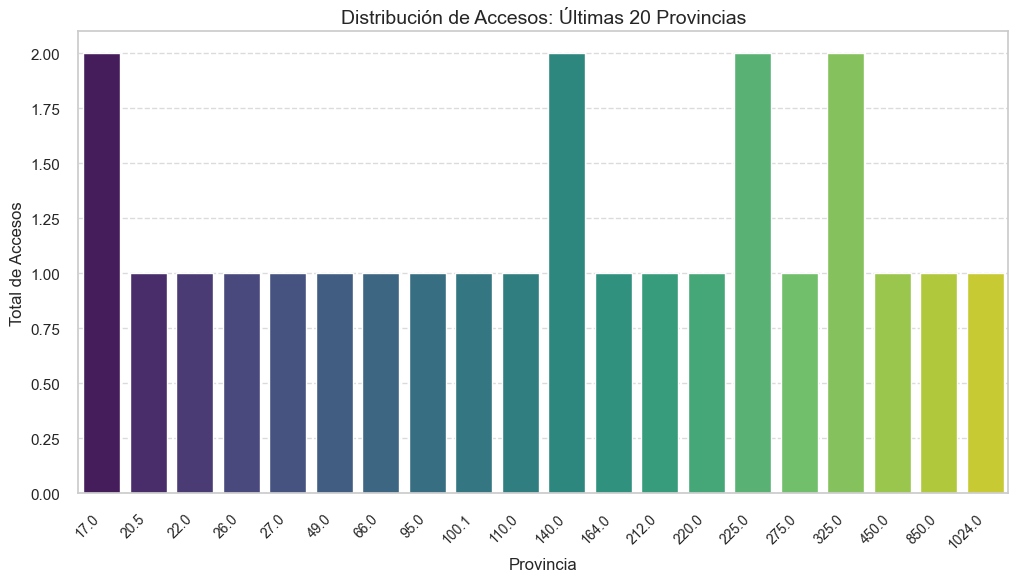

In [50]:
# Agrupar por provincia y sumar los accesos
accesos_por_provincia = df.groupby('Provincia')['Accesos'].sum().sort_values(ascending=False)

# Filtrar los últimos 20 valores
ultimos_20_accesos = accesos_por_provincia.tail(20)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ultimos_20_accesos.index, y=ultimos_20_accesos.values, palette='viridis')
plt.title('Distribución de Accesos: Últimas 20 Provincias', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Total de Accesos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



##  "Distribución de Accesos: Últimas 20 Provincias"
### Observaciones:
- Hay un claro contraste en el total de accesos entre provincias. Algunas tienen una cantidad significativamente menor de accesos (menos de 1.0), mientras que otras están más cerca del límite de 2.0.
Esto podría reflejar desigualdades en la cobertura de Internet entre las provincias más relegadas.
### Insight:
- Las provincias con los menores accesos necesitan ser priorizadas para expandir infraestructura y servicios de conectividad. Esto está alineado con la meta del proyecto de incrementar la conectividad en comunidades rurales y provincias menos desarrolladas como Formosa y Catamarca.

### Recomendación:
- Centrarse en estas provincias para establecer redes satelitales o ampliar las redes existentes.
 